In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import os


In [2]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
torch.manual_seed(1)

In [4]:
def train_model(neural_net, input_data, target_data):
    max_iterations = 20000
    iteration_list, loss_list = [], []
    has_converged = False
    iteration = 0
    while not has_converged:
        iteration += 1
        output = neural_net(input_data)
        loss_value = loss_function(output, target_data)
        optimizer_instance.zero_grad()
        loss_value.backward()
        optimizer_instance.step()
        iteration_list.append(iteration)
        loss_list.append(loss_value.detach().numpy())
        
        if iteration % 500 == 0: 
            print(f'Iteration: {iteration}, Loss = {loss_value.item():.4f}')
                
        if iteration == max_iterations:
            print("Maximum Iterations Reached")
            has_converged = True

        elif (iteration > 5) and (loss_list[-1] < 0.001):
            if abs(loss_list[-3] - loss_list[-2]) < 1.0e-05 and abs(loss_list[-2] - loss_list[-1]) < 1.0e-05:
                print("Convergence achieved for loss:", loss_list[-1])
                has_converged = True
                
    return iteration_list, loss_list, output

In [5]:
input_values = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1) 
print(input_values.shape)
target_values = np.sinc(5 * input_values)
print(target_values.shape)


(300, 1)
(300, 1)


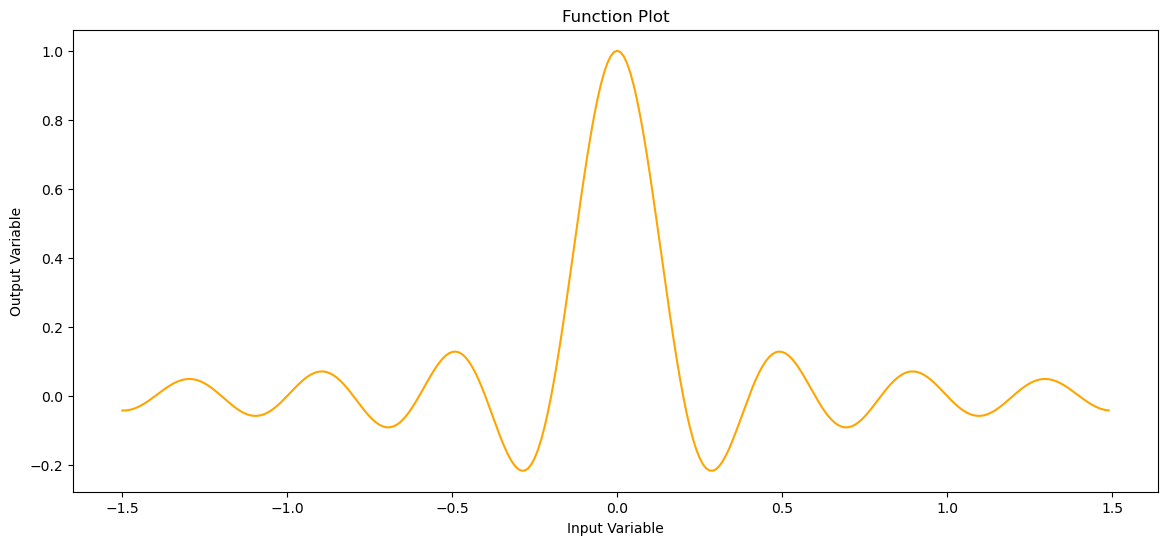

In [6]:
input_values, target_values = torch.tensor(input_values, dtype=torch.float32), torch.tensor(target_values, dtype=torch.float32)
plt.figure(figsize=(14, 6))
plt.plot(input_values, target_values, color="orange")
plt.title('Function Plot')
plt.xlabel('Input Variable')
plt.ylabel('Output Variable')
plt.show()


*********
MODEL 1
*********


In [7]:
class NeuralNet1(nn.Module):
    def __init__(self):
        super(NeuralNet1, self).__init__()
        self.fc1 = nn.Linear(1, 5)
        self.fc2 = nn.Linear(5, 10)
        self.fc3 = nn.Linear(10, 10)
        self.fc4 = nn.Linear(10, 10)
        self.fc5 = nn.Linear(10, 10)
        self.fc6 = nn.Linear(10, 10)
        self.fc7 = nn.Linear(10, 5)
        self.output_layer = nn.Linear(5, 1)
    
    def forward(self, x):
        x = nn.functional.leaky_relu(self.fc1(x))
        x = nn.functional.leaky_relu(self.fc2(x))
        x = nn.functional.leaky_relu(self.fc3(x))
        x = nn.functional.leaky_relu(self.fc4(x))
        x = nn.functional.leaky_relu(self.fc5(x))
        x = nn.functional.leaky_relu(self.fc6(x))
        x = nn.functional.leaky_relu(self.fc7(x))

        x = self.output_layer(x)
        return x

model_a = NeuralNet1()

In [8]:
optimizer_instance = torch.optim.RMSprop(model_a.parameters(), lr=1e-3, weight_decay=1e-4)
loss_function = torch.nn.MSELoss()
total_params_a = sum(p.numel() for p in model_a.parameters())
print(total_params_a)
epochs_a, losses_a, predictions_a = train_model(model_a, input_values, target_values)


571
Iteration: 500, Loss = 0.0050
Iteration: 1000, Loss = 0.0028
Iteration: 1500, Loss = 0.0024
Iteration: 2000, Loss = 0.0025
Iteration: 2500, Loss = 0.0025
Iteration: 3000, Loss = 0.0024
Iteration: 3500, Loss = 0.0023
Iteration: 4000, Loss = 0.0024
Iteration: 4500, Loss = 0.0025
Iteration: 5000, Loss = 0.0025
Iteration: 5500, Loss = 0.0022
Iteration: 6000, Loss = 0.0021
Iteration: 6500, Loss = 0.0021
Iteration: 7000, Loss = 0.0020
Iteration: 7500, Loss = 0.0017
Iteration: 8000, Loss = 0.0019
Iteration: 8500, Loss = 0.0019
Iteration: 9000, Loss = 0.0016
Iteration: 9500, Loss = 0.0020
Iteration: 10000, Loss = 0.0014
Iteration: 10500, Loss = 0.0014
Iteration: 11000, Loss = 0.0014
Iteration: 11500, Loss = 0.0015
Iteration: 12000, Loss = 0.0018
Iteration: 12500, Loss = 0.0023
Iteration: 13000, Loss = 0.0013
Iteration: 13500, Loss = 0.0013
Iteration: 14000, Loss = 0.0015
Iteration: 14500, Loss = 0.0016
Iteration: 15000, Loss = 0.0013
Iteration: 15500, Loss = 0.0012
Iteration: 16000, Loss =

************
MODEL 2
************


In [9]:
class NeuralNet2(nn.Module):
    def __init__(self):
        super(NeuralNet2, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 17)
        self.fc3 = nn.Linear(17, 15)
        self.fc4 = nn.Linear(15, 4)
        self.output_layer = nn.Linear(4, 1)
    
    def forward(self, x):
        x = nn.functional.leaky_relu(self.fc1(x))
        x = nn.functional.leaky_relu(self.fc2(x))
        x = nn.functional.leaky_relu(self.fc3(x))
        x = nn.functional.leaky_relu(self.fc4(x))

        x = self.output_layer(x)
        return x

model_b = NeuralNet2()

In [10]:
optimizer_instance = torch.optim.RMSprop(model_b.parameters(), lr=1e-3, weight_decay=1e-4)
loss_function = torch.nn.MSELoss() 
total_params_b = sum(p.numel() for p in model_b.parameters())
print(total_params_b)
epochs_b, losses_b, predictions_b = train_model(model_b, input_values, target_values)

546
Iteration: 500, Loss = 0.0054
Iteration: 1000, Loss = 0.0042
Iteration: 1500, Loss = 0.0028
Iteration: 2000, Loss = 0.0026
Iteration: 2500, Loss = 0.0026
Iteration: 3000, Loss = 0.0025
Iteration: 3500, Loss = 0.0025
Iteration: 4000, Loss = 0.0026
Iteration: 4500, Loss = 0.0024
Iteration: 5000, Loss = 0.0024
Iteration: 5500, Loss = 0.0024
Iteration: 6000, Loss = 0.0024
Iteration: 6500, Loss = 0.0024
Iteration: 7000, Loss = 0.0023
Iteration: 7500, Loss = 0.0024
Iteration: 8000, Loss = 0.0024
Iteration: 8500, Loss = 0.0023
Iteration: 9000, Loss = 0.0023
Iteration: 9500, Loss = 0.0024
Iteration: 10000, Loss = 0.0023
Iteration: 10500, Loss = 0.0022
Iteration: 11000, Loss = 0.0021
Iteration: 11500, Loss = 0.0018
Iteration: 12000, Loss = 0.0018
Iteration: 12500, Loss = 0.0017
Iteration: 13000, Loss = 0.0017
Iteration: 13500, Loss = 0.0015
Iteration: 14000, Loss = 0.0015
Iteration: 14500, Loss = 0.0015
Iteration: 15000, Loss = 0.0015
Iteration: 15500, Loss = 0.0014
Iteration: 16000, Loss =

************
MODEL 3
************


In [11]:
class NeuralNet3(nn.Module):
    def __init__(self):
        super(NeuralNet3, self).__init__()
        self.fc1 = nn.Linear(1, 189)
        self.output_layer = nn.Linear(189, 1)
    
    def forward(self, x):
        x = nn.functional.leaky_relu(self.fc1(x))

        x = self.output_layer(x)
        return x

model_c = NeuralNet3()


In [12]:
optimizer_instance = torch.optim.RMSprop(model_c.parameters(), lr=1e-3, weight_decay=1e-4)
loss_function = torch.nn.MSELoss()
total_params_c = sum(p.numel() for p in model_c.parameters())
print(total_params_c)
epochs_c, losses_c, predictions_c = train_model(model_c, input_values, target_values)


568
Iteration: 500, Loss = 0.0286
Iteration: 1000, Loss = 0.0201
Iteration: 1500, Loss = 0.0157
Iteration: 2000, Loss = 0.0126
Iteration: 2500, Loss = 0.0106
Iteration: 3000, Loss = 0.0093
Iteration: 3500, Loss = 0.0083
Iteration: 4000, Loss = 0.0076
Iteration: 4500, Loss = 0.0072
Iteration: 5000, Loss = 0.0068
Iteration: 5500, Loss = 0.0065
Iteration: 6000, Loss = 0.0063
Iteration: 6500, Loss = 0.0061
Iteration: 7000, Loss = 0.0060
Iteration: 7500, Loss = 0.0059
Iteration: 8000, Loss = 0.0058
Iteration: 8500, Loss = 0.0057
Iteration: 9000, Loss = 0.0056
Iteration: 9500, Loss = 0.0055
Iteration: 10000, Loss = 0.0055
Iteration: 10500, Loss = 0.0054
Iteration: 11000, Loss = 0.0054
Iteration: 11500, Loss = 0.0053
Iteration: 12000, Loss = 0.0052
Iteration: 12500, Loss = 0.0052
Iteration: 13000, Loss = 0.0052
Iteration: 13500, Loss = 0.0052
Iteration: 14000, Loss = 0.0051
Iteration: 14500, Loss = 0.0050
Iteration: 15000, Loss = 0.0050
Iteration: 15500, Loss = 0.0050
Iteration: 16000, Loss =

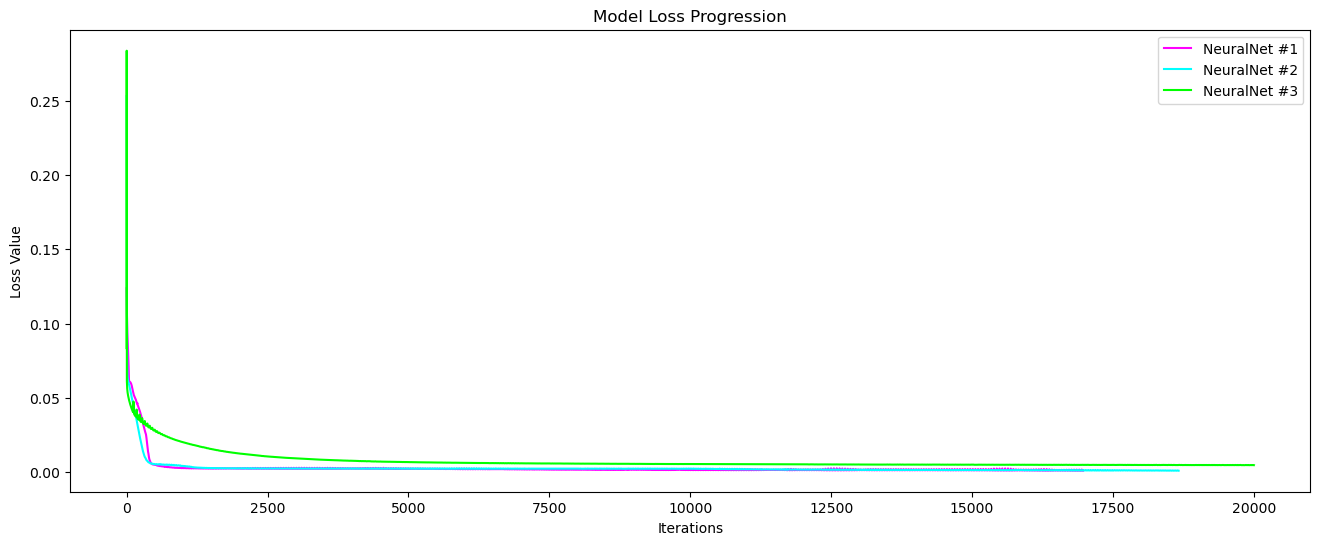

In [13]:
plt.figure(figsize=(16, 6))
plt.plot(epochs_a, losses_a, color="magenta")
plt.plot(epochs_b, losses_b, color="cyan")
plt.plot(epochs_c, losses_c, color="lime")
plt.title('Model Loss Progression')
plt.legend(['NeuralNet #1', 'NeuralNet #2', 'NeuralNet #3'])
plt.xlabel('Iterations')
plt.ylabel('Loss Value')
plt.show()

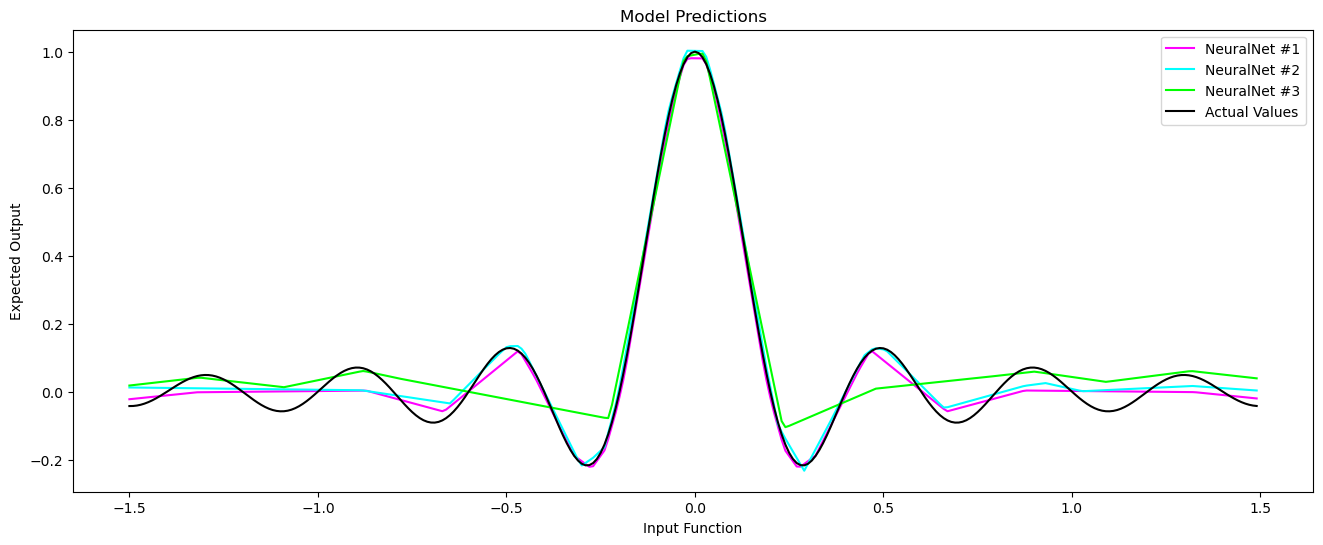

In [14]:
plt.figure(figsize=(16, 6))
plt.plot(input_values, predictions_a.data, color="magenta", label='NeuralNet #1')
plt.plot(input_values, predictions_b.data, color="cyan", label='NeuralNet #2')
plt.plot(input_values, predictions_c.data, color="lime", label='NeuralNet #3')
plt.plot(input_values, target_values, color="black", label='Actual Values')
plt.title('Model Predictions')
plt.xlabel('Input Function')
plt.ylabel('Expected Output')
plt.legend()
plt.show()

In [15]:
torch.manual_seed(1)

In [16]:

input_values = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
print(input_values.shape)
target_values = np.sign(np.sin(5 * np.pi * input_values))
print(target_values.shape)


(300, 1)
(300, 1)


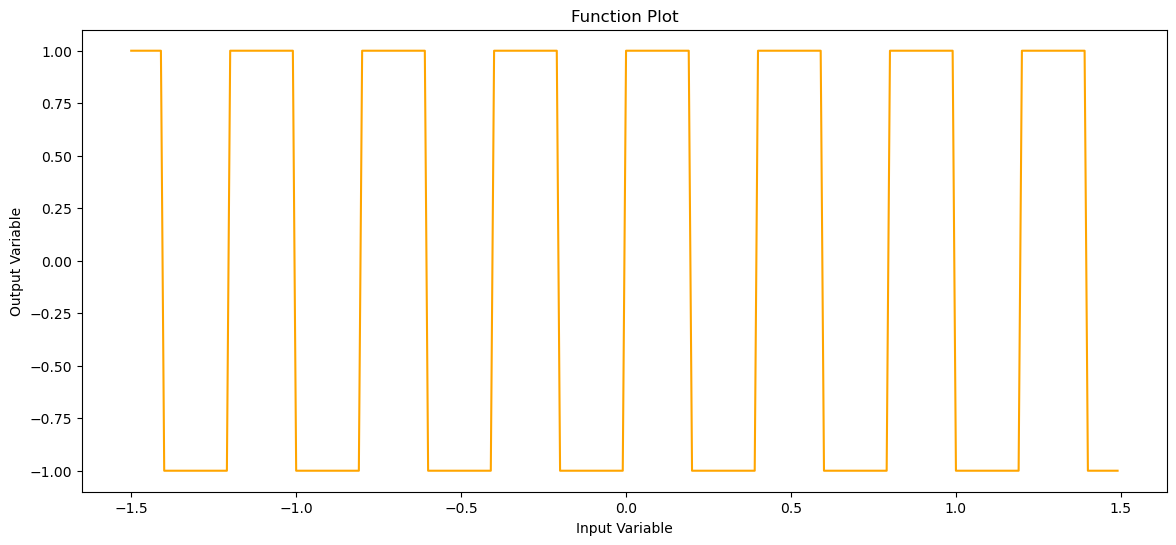

In [17]:
input_values, target_values = torch.tensor(input_values, dtype=torch.float32), torch.tensor(target_values, dtype=torch.float32)
plt.figure(figsize=(14, 6))
plt.plot(input_values, target_values, color="orange")

plt.title('Function Plot')
plt.xlabel('Input Variable')
plt.ylabel('Output Variable')
plt.show()


##########
MODEL 1
##########

In [18]:
model_sign_a = NeuralNet1()
optimizer_instance = torch.optim.Adam(model_sign_a.parameters(), lr=1e-3, weight_decay=1e-4)
loss_function = torch.nn.MSELoss() 
total_params_sign_a = sum(p.numel() for p in model_sign_a.parameters())
print(total_params_sign_a)
epochs_sign_a, losses_sign_a, predictions_sign_a = train_model(model_sign_a, input_values, target_values)

571
Iteration: 500, Loss = 0.9993
Iteration: 1000, Loss = 0.6855
Iteration: 1500, Loss = 0.5719
Iteration: 2000, Loss = 0.4874
Iteration: 2500, Loss = 0.4761
Iteration: 3000, Loss = 0.4687
Iteration: 3500, Loss = 0.4754
Iteration: 4000, Loss = 0.4627
Iteration: 4500, Loss = 0.4484
Iteration: 5000, Loss = 0.4446
Iteration: 5500, Loss = 0.4307
Iteration: 6000, Loss = 0.4429
Iteration: 6500, Loss = 0.4680
Iteration: 7000, Loss = 0.4289
Iteration: 7500, Loss = 0.4228
Iteration: 8000, Loss = 0.4194
Iteration: 8500, Loss = 0.4303
Iteration: 9000, Loss = 0.4353
Iteration: 9500, Loss = 0.4187
Iteration: 10000, Loss = 0.4321
Iteration: 10500, Loss = 0.4272
Iteration: 11000, Loss = 0.4228
Iteration: 11500, Loss = 0.4118
Iteration: 12000, Loss = 0.4136
Iteration: 12500, Loss = 0.4367
Iteration: 13000, Loss = 0.4315
Iteration: 13500, Loss = 0.4188
Iteration: 14000, Loss = 0.4222
Iteration: 14500, Loss = 0.4134
Iteration: 15000, Loss = 0.4099
Iteration: 15500, Loss = 0.4374
Iteration: 16000, Loss =

########## MODEL 2 ##########

In [19]:
model_sign_b = NeuralNet2()
optimizer_instance = torch.optim.Adam(model_sign_b.parameters(), lr=1e-3, weight_decay=1e-4)
loss_function = torch.nn.MSELoss() 
total_params_sign_b = sum(p.numel() for p in model_sign_b.parameters())
print(total_params_sign_b)
epochs_sign_b, losses_sign_b, predictions_sign_b = train_model(model_sign_b, input_values, target_values)

546
Iteration: 500, Loss = 0.9982
Iteration: 1000, Loss = 0.9130
Iteration: 1500, Loss = 0.6402
Iteration: 2000, Loss = 0.4993
Iteration: 2500, Loss = 0.4708
Iteration: 3000, Loss = 0.4596
Iteration: 3500, Loss = 0.4548
Iteration: 4000, Loss = 0.4500
Iteration: 4500, Loss = 0.4474
Iteration: 5000, Loss = 0.4462
Iteration: 5500, Loss = 0.4518
Iteration: 6000, Loss = 0.4444
Iteration: 6500, Loss = 0.4438
Iteration: 7000, Loss = 0.4482
Iteration: 7500, Loss = 0.4435
Iteration: 8000, Loss = 0.4400
Iteration: 8500, Loss = 0.4458
Iteration: 9000, Loss = 0.3365
Iteration: 9500, Loss = 0.2593
Iteration: 10000, Loss = 0.2087
Iteration: 10500, Loss = 0.1811
Iteration: 11000, Loss = 0.1675
Iteration: 11500, Loss = 0.1452
Iteration: 12000, Loss = 0.1331
Iteration: 12500, Loss = 0.1333
Iteration: 13000, Loss = 0.1216
Iteration: 13500, Loss = 0.1217
Iteration: 14000, Loss = 0.1280
Iteration: 14500, Loss = 0.1185
Iteration: 15000, Loss = 0.1146
Iteration: 15500, Loss = 0.1104
Iteration: 16000, Loss =

###### MODEL 3 #########


In [20]:
model_sign_c = NeuralNet3()
optimizer_instance = torch.optim.Adam(model_sign_c.parameters(), lr=1e-3, weight_decay=1e-4)
loss_function = torch.nn.MSELoss()
total_params_sign_c = sum(p.numel() for p in model_sign_c.parameters())
print(total_params_sign_c)
epochs_sign_c, losses_sign_c, predictions_sign_c = train_model(model_sign_c, input_values, target_values)

568
Iteration: 500, Loss = 0.8916
Iteration: 1000, Loss = 0.6742
Iteration: 1500, Loss = 0.5072
Iteration: 2000, Loss = 0.3940
Iteration: 2500, Loss = 0.3259
Iteration: 3000, Loss = 0.2872
Iteration: 3500, Loss = 0.2649
Iteration: 4000, Loss = 0.2509
Iteration: 4500, Loss = 0.2388
Iteration: 5000, Loss = 0.2306
Iteration: 5500, Loss = 0.2237
Iteration: 6000, Loss = 0.2191
Iteration: 6500, Loss = 0.2155
Iteration: 7000, Loss = 0.2127
Iteration: 7500, Loss = 0.2104
Iteration: 8000, Loss = 0.2086
Iteration: 8500, Loss = 0.2070
Iteration: 9000, Loss = 0.2056
Iteration: 9500, Loss = 0.2045
Iteration: 10000, Loss = 0.2033
Iteration: 10500, Loss = 0.2022
Iteration: 11000, Loss = 0.2013
Iteration: 11500, Loss = 0.2004
Iteration: 12000, Loss = 0.1997
Iteration: 12500, Loss = 0.1990
Iteration: 13000, Loss = 0.1982
Iteration: 13500, Loss = 0.1974
Iteration: 14000, Loss = 0.1967
Iteration: 14500, Loss = 0.1943
Iteration: 15000, Loss = 0.1933
Iteration: 15500, Loss = 0.1925
Iteration: 16000, Loss =

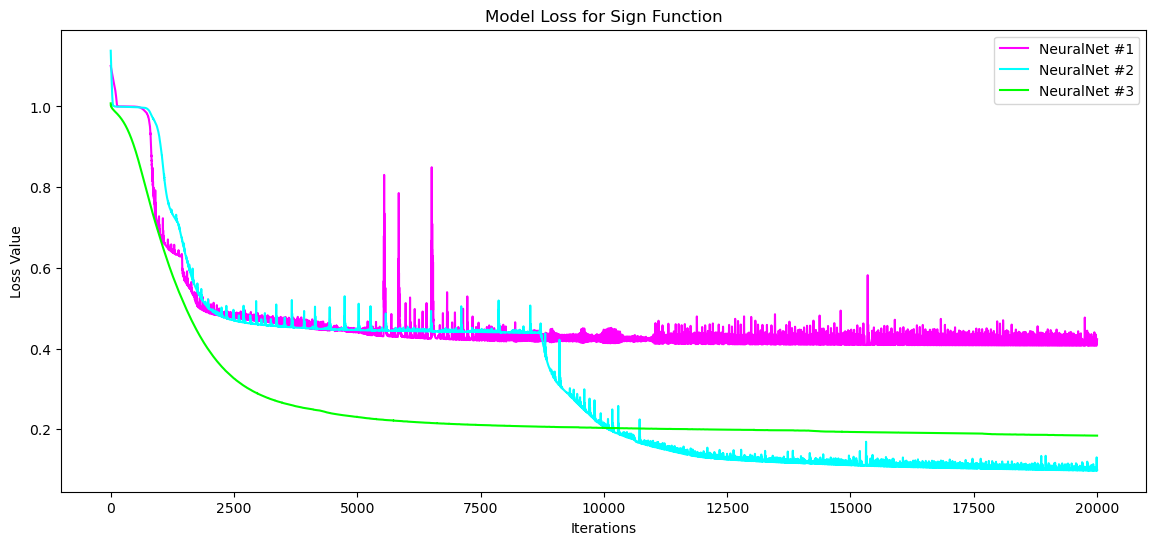

In [21]:
plt.figure(figsize=(14, 6))
plt.plot(epochs_sign_a, losses_sign_a, color="magenta")
plt.plot(epochs_sign_b, losses_sign_b, color="cyan")
plt.plot(epochs_sign_c, losses_sign_c, color="lime")
plt.title('Model Loss for Sign Function')
plt.legend(['NeuralNet #1', 'NeuralNet #2', 'NeuralNet #3'])
plt.xlabel('Iterations')
plt.ylabel('Loss Value')
plt.show()

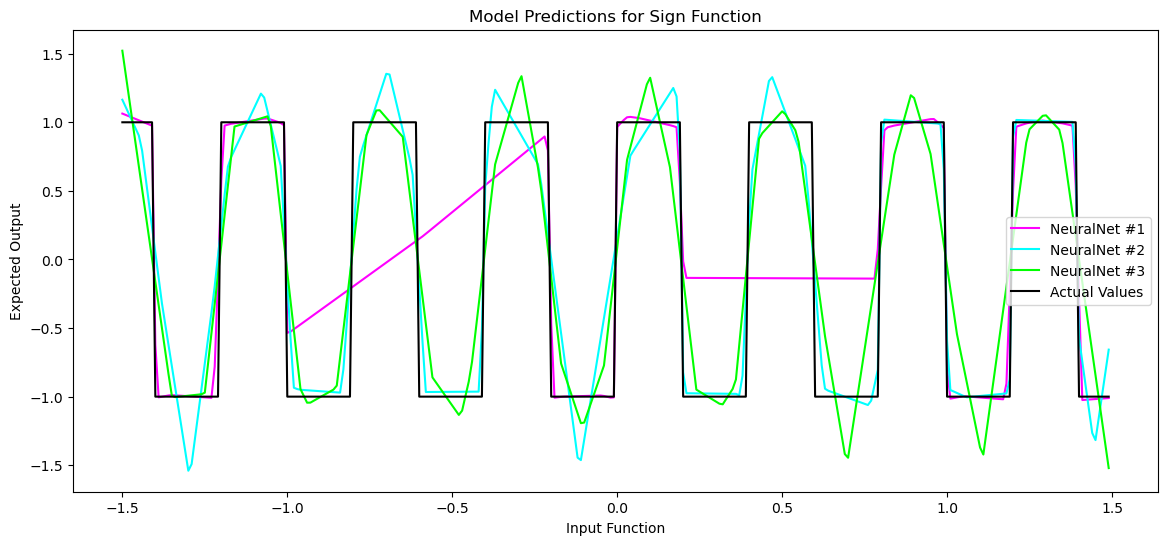

In [22]:
plt.figure(figsize=(14, 6))
plt.plot(input_values, predictions_sign_a.data, color="magenta", label='NeuralNet #1')
plt.plot(input_values, predictions_sign_b.data, color="cyan", label='NeuralNet #2')
plt.plot(input_values, predictions_sign_c.data, color="lime", label='NeuralNet #3')
plt.plot(input_values, target_values, color="black", label='Actual Values')
plt.title('Model Predictions for Sign Function')
plt.xlabel('Input Function')
plt.ylabel('Expected Output')
plt.legend()
plt.show()